# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** XXXX

**Author 1 (sciper):** Louis Le Guillouzic (286876)  
**Author 2 (sciper):** Hugo Masson (314886)   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [246]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

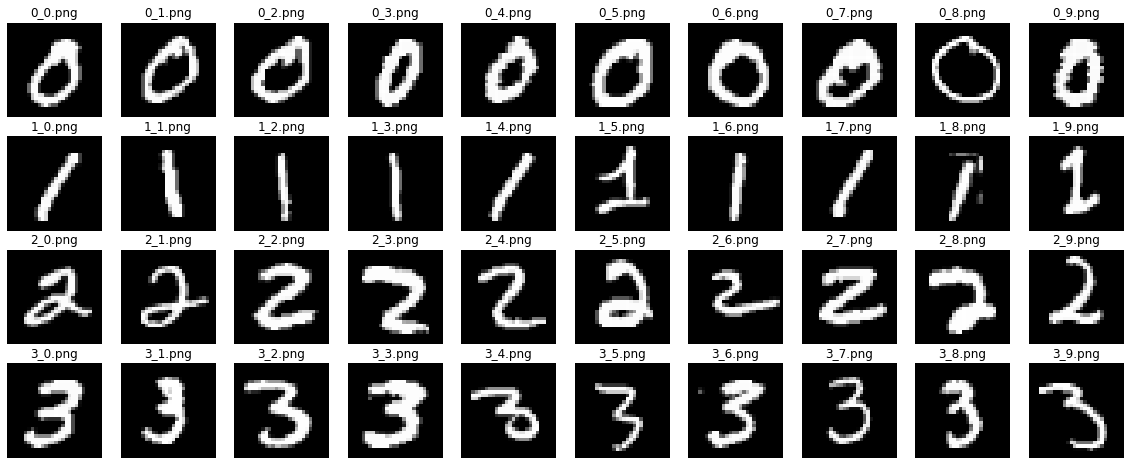

In [247]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

Binarisation --> only black or white
Filter to better identify

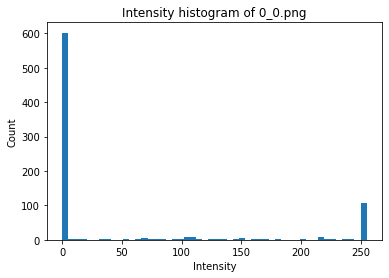

<function matplotlib.pyplot.show(close=None, block=None)>

In [248]:
plt.hist(zeros_im[3].ravel(), bins=50)
plt.title('Intensity histogram of 0_0.png')
plt.ylabel('Count')
plt.xlabel('Intensity')
plt.show()
plt.show

We can observe that the image contains mainly pixels with two intensities, 0 and 256. To remove the "noisy" pixels in the middle, we can apply a binarisation technique using Otsu's method. This method calculates an optimal threshold value that separates the pixels into two classes, foreground and background. Then, all pixels below the threshold are set to 0 (black) and all pixels above the threshold are set to 1 (white). This results in a binary image with only two pixel values, which simplifies further processing.

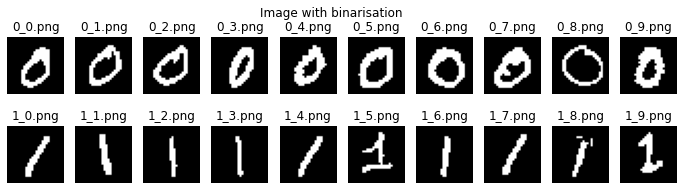

In [249]:
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

def binarisation(im):
    threshold = threshold_otsu(im)
    binary = np.asarray((im > threshold).astype(float))
    binary[binary==1] = 255
    return binary

zeros = []
ones = []

fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    binary0 = binarisation(im)
    zeros.append(binary0)
    ax.imshow(binary0, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], ones_im, ones_names):
    one = binarisation(im)
    ones.append(one)
    ax.imshow(one, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig.suptitle("Image with binarisation")
plt.show()


In [250]:

import cv2
import numpy as np
from skimage import measure
from skimage.filters import threshold_otsu

def preprocessing(images):
    processed_images = []

    disksize_close = skimage.morphology.disk(1.2)
    disksize_open = skimage.morphology.disk(0) # no opening


    for image in images:
        
        #allocation
        mask_morph = np.zeros_like(image)


        #tresholding
        threshold = threshold_otsu(image)
        binary = np.asarray((image > threshold).astype(float))
        binary[binary==1] = 255

        #combinaison of morphological operation
        skimage.morphology.closing(binary, disksize_close,out=mask_morph)
        #Opening
        skimage.morphology.opening(mask_morph, disksize_open,out=mask_morph)
        #Remove holes
        mask_morph= skimage.morphology.remove_small_holes(mask_morph, 2)
        #Remove objects
        mask_morph= skimage.morphology.remove_small_objects(mask_morph, 4)
 
        # Ajout de l'image prétraitée à la liste de sortie
        processed_images.append(mask_morph)
    return processed_images



In [251]:
import numpy as np
from skimage.measure import find_contours
from scipy.interpolate import interp1d

def contours(number):
    ''' 
    Return a list of the contours of the given list of number
    '''
    cst_value_contour = 2

    number = np.asarray(number)

    if number.ndim == 2:  # Only one number
        temp = np.asarray(find_contours(number, cst_value_contour))
        return temp

    number_contour = []

    for i in range(number.shape[0]):

        temp = find_contours(number[i], cst_value_contour)

        if len(temp) == 1:  # we found only one contour
            temp = np.squeeze(temp)
            number_contour.append(temp)
        else:  # We found a list of contour (, so it's a 0.) We take the first one (first to be find is the outer part)
            temp = np.squeeze(temp[0])
            number_contour.append(temp)
    return number_contour


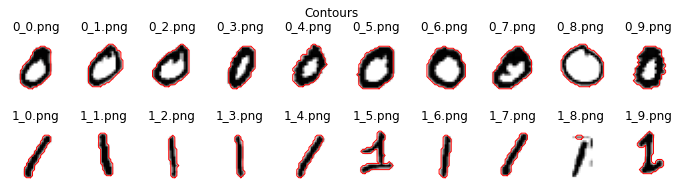

In [252]:
zero_cont=contours(zeros)
ones_cont=contours(ones)

fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))

for ax, cont, nm, orig in zip(axes[0], zero_cont, zeros_names, zeros_im):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.plot(cont[:,1],cont[:,0], c='red', linewidth=1)
    ax.axis('off')
    ax.set_title(nm)

for ax, cont, nm, orig in zip(axes[1], ones_cont, ones_names, ones_im):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.plot(cont[:,1],cont[:,0], c='red', linewidth=1)
    ax.axis('off')
    ax.set_title(nm)
    
fig.suptitle("Contours")
plt.show()


#### Discussion

As we can see the only one that fail was the 1_8 because there were some other form than the 1. To remove it we can do an opening to only keep the pixels that form the digit 1.

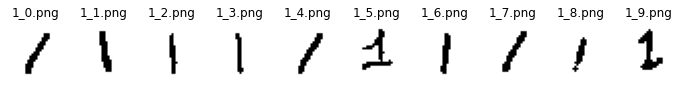

In [253]:
from skimage.morphology import square
from skimage.morphology.binary import binary_opening
    
disksize_close = skimage.morphology.disk(1)
disksize_open = skimage.morphology.disk(0) # no opening

# Opening on 1_8.png
ones[8] = binary_opening(ones[8], disksize_close)
ones[8][ones[8] == 1] = 255 

fig, axes = plt.subplots(1, len(ones), figsize=(12, 3))

for ax, cont, nm, orig in zip(axes, ones_cont, ones_names, ones):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.axis('off')
    ax.set_title(nm)

### 1.2. Get descriptors (4 pts)

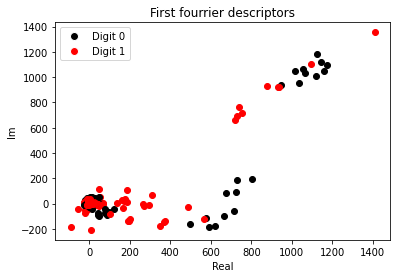

In [254]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

def fourrier(contour):
    FFTs = []
    if len(contour) > 0:
        u_k = contour[:, 0] + 1j * contour[:, 1]   # create the complex number
        FFT = np.fft.fft(u_k)          # compute the Fourier transform
        FFTs.append(FFT)
        return np.concatenate(FFTs)         # concatenate all the Fourier transforms into a single array
    else:
        return np.array(FFTs)



from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Digit 0',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Digit 1',
                          markerfacecolor='r', markersize=8)]
plt.figure()
plt.title('First fourrier descriptors')
plt.xlabel('Real')
plt.ylabel('Im')
plt.legend(handles=legend_elements)

for ct0, ct1, nm0, nm1 in zip(zero_cont, ones_cont, zeros_names, ones_names):
    # Digit 0
    fft0 = fourrier(ct0)
    plt.scatter(fft0.real, fft0.imag, c='k')
    
    # Digit 1
    fft1 = fourrier(ct1)
    plt.scatter(fft1.real, fft1.imag, c='r')



### 1.3. Study effect of descriptors (6 pts)

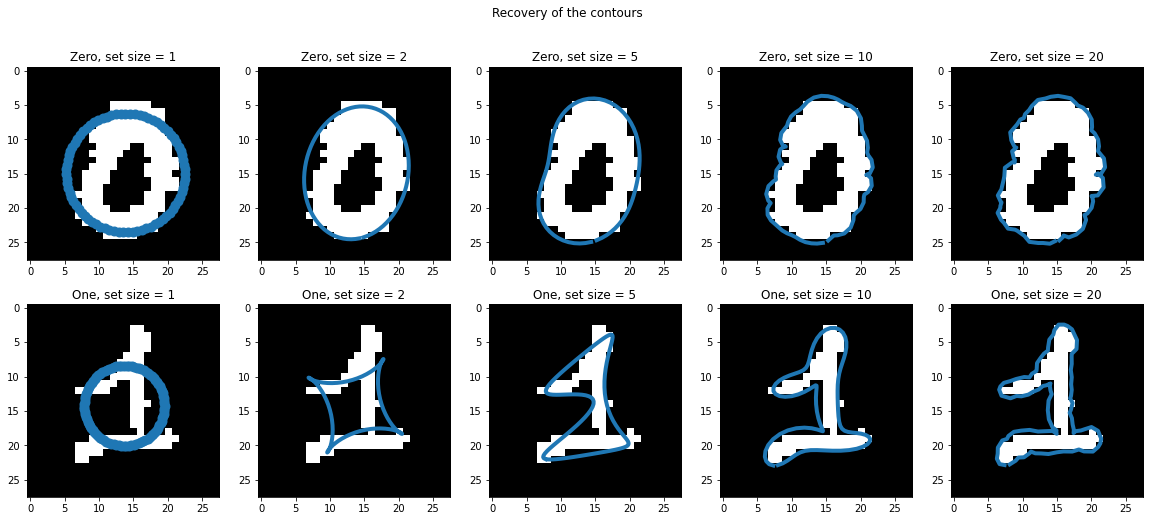

In [283]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zero_cont[9]
one = ones_cont[5]

fft0 = fourrier(zero)
fft1 = fourrier(one)

# Sort the Fourier descriptors based on frequency
fft0_sorted = sorted(fft0, key=lambda x: abs(x), reverse=True)
fft1_sorted = sorted(fft1, key=lambda x: abs(x), reverse=True)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Plot recovery for a zero image
for i in range(0, 5):
    # Reconstruction using different amounts of descriptors
    fft_desc_0 = np.array(fft0)
    #only keep the lowest frequency
    fft_desc_0[np.where(np.abs(fft_desc_0) < np.abs(fft0_sorted[descr_set_sizes[i]]))] = 0
    ifft_contour_0 = np.fft.ifft(fft_desc_0)
    reconst_contour_0 = np.zeros((ifft_contour_0.shape[0], 2))
    reconst_contour_0[:, 0] = np.real(ifft_contour_0)
    reconst_contour_0[:, 1] = np.imag(ifft_contour_0)
    # Plot the reconstructed contour
    axes[0,i].imshow(zeros[9], cmap='gray')
    if i == 0:
        axes[0,i].scatter(reconst_contour_0[:, 1], reconst_contour_0[:, 0], linewidth=4)
    else:
        axes[0,i].plot(reconst_contour_0[:, 1], reconst_contour_0[:, 0], linewidth=4)
    axes[0,i].set_title("Zero, set size = " + str(descr_set_sizes[i]))
    axes[0,i].set_aspect('equal')  # Set aspect ratio to be equal

# Plot recovery for a one image
for i in range(0, 5):
    # Reconstruction using different amounts of descriptors
    fft_desc_1 = np.array(fft1)
    #only keep the lowest frequency
    fft_desc_1[np.where(np.abs(fft_desc_1) < np.abs(fft1_sorted[descr_set_sizes[i]]))] = 0
    ifft_contour_1 = np.fft.ifft(fft_desc_1)
    reconst_contour_1 = np.zeros((ifft_contour_1.shape[0], 2))
    reconst_contour_1[:, 0] = np.real(ifft_contour_1)
    reconst_contour_1[:, 1] = np.imag(ifft_contour_1)
    # Plot the reconstructed contour
    axes[1,i].imshow(ones[5], cmap='gray')
    if i == 0:
        axes[1,i].scatter(reconst_contour_1[:, 1], reconst_contour_1[:, 0], linewidth=4)
    else:
        axes[1,i].plot(reconst_contour_1[:, 1], reconst_contour_1[:, 0], linewidth=4)
    axes[1,i].set_title("One, set size = " + str(descr_set_sizes[i]))
    axes[1,i].set_aspect('equal')  # Set aspect ratio to be equal

fig.suptitle("Recovery of the contours")
plt.show()




#### Discussion

As we can see, the more descriptors we use, the more the contour converg toward the original form.

### 1.4 Clustering (2 pts)

As we have seen on the 1.2 part it's quite messy, so we try to only plot the first 2 amplitudes : 

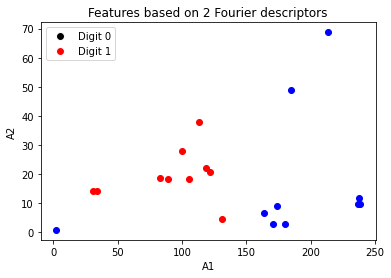

In [256]:
def plotFourier(zeros, ones, name0=zeros_names, name1=ones_names, handle_legend=legend_elements):
    plt.figure()
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.legend(handles=handle_legend)
    plt.title("Features based on 2 Fourier descriptors")

    # First feature for all "0"s
    zeros_f1 = []
    # Second feature for all "0"s
    zeros_f2 = []
    # Fist feature for all "1"s
    ones_f1 = []
    # Second feature for all "1"s
    ones_f2 = []

    for im0, im1, nm0, nm1 in zip(zeros, ones, name0, name1):
    
        # Digit 0
        fft0 = fourrier(im0)
        A1_0 = abs(fft0[1]) # First amplitude
        A2_0 = abs(fft0[2]) # Second amplitude
        zeros_f1.append(A1_0)
        zeros_f2.append(A2_0)
        plt.scatter(A1_0, A2_0, c='r')
    
        # Digit 1
        fft1 = fourrier(im1)
        A1_1 = abs(fft1[1]) # First amplitude
        A2_1 = abs(fft1[2]) # Second amplitude
        ones_f1.append(A1_1)
        ones_f2.append(A2_1)
        plt.scatter(A1_1, A2_1, c='b')

plotFourier(zero_cont, ones_cont)

We can see that the 0 digit are on the left part of the plot while the 1 digit are on the right (except one), thus the amplitudes of the first two Fourier descriptors seem to be good features.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

We want our features to be invariant to : rotation, scaling, translation and the combinaison of the 3. We thus need to do some modification on the Fourier descriptors :

#### Implementation

In [257]:
# Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    contour = contours(img)
    fft = fourrier(contour)

    #make the feature invariant : 

    # If inv_to_rotation is True, the absolute values of the Fourier descriptors are taken to make them invariant to rotation.
    # If inv_to_translation is True, the first feature is removed since it is sensitive to translation.
    # If inv_to_scale is True, the first feature is divided by the rest of the features to make them invariant to scale.

    if inv_to_rotation:
        fft=np.abs(fft)
    if inv_to_scale:
        fft=fft[1:]/fft[2]
    if inv_to_translation:
        fft=fft[1:]
    return fft

In [258]:
# Define custom rotation function. You may add other parameters to the function.

import numpy as np
from scipy import ndimage
import cv2
from skimage import transform

def random_rotate(img):
    return transform.rotate(img,np.random.randint(0,360))

# Define custom rotation function. You may add other parameters to the function.
def random_translate(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (cols, rows))
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    return resized

In [259]:
# We will define 4 sets of new images below


zeros_array = np.array(zeros)
ones_array = np.array(ones)


# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = random_rotate(zeros_array)
rotated_images_ones = random_rotate(ones_array)


# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = random_translate(zeros_array, 2, 2)
translated_images_ones = random_translate(ones_array, 2, 2)


# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = random_scale(zeros_array, 110)
scaled_images_ones = random_scale(ones_array, 110)




# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
rotated_images_zeros_0 = random_rotate(zeros_array)
translated_images_zeros_0 = random_translate(rotated_images_zeros_0, 2, 2)
transformed_images_zeros = random_scale(translated_images_zeros_0, 110)

rotated_images_ones_1 = random_rotate(ones_array)
translated_images_ones_1 = random_translate(rotated_images_ones_1, 2, 2)
transformed_images_ones = random_scale(translated_images_ones_1, 110)

In [260]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invariant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


inv_rotated_images_zeros = [get_invariant_features(img, True, False, False) for img in rotated_images_zeros]
inv_rotated_images_ones = [get_invariant_features(img, True, False, False) for img in rotated_images_ones]


inv_translated_images_zeros = [get_invariant_features(img, False, True, False) for img in translated_images_zeros]
inv_translated_images_ones = [get_invariant_features(img, False, True, False) for img in translated_images_ones]


inv_scaled_images_zeros = [get_invariant_features(img, False, False, True) for img in scaled_images_zeros]
inv_scaled_images_ones = [get_invariant_features(img, False, False, True) for img in scaled_images_ones]


inv_zeros = [get_invariant_features(img, True, True, True) for img in transformed_images_zeros]
inv_ones = [get_invariant_features(img, True, True, True) for img in transformed_images_ones]

c:\Users\hugom\Anaconda3\envs\iapr\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

We plot the modified image to see if everything works properly : 

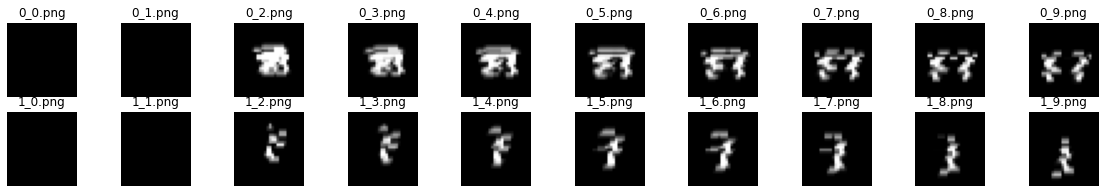

In [ ]:
fig, axes = plt.subplots(2, len(zeros_im), figsize=(20, 3))

for ax, im, nm in zip(axes[0], transformed_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], transformed_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

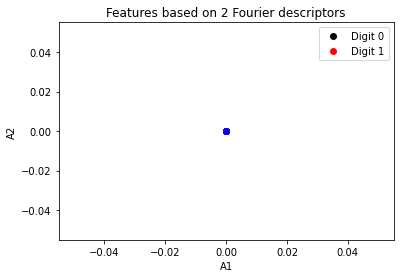

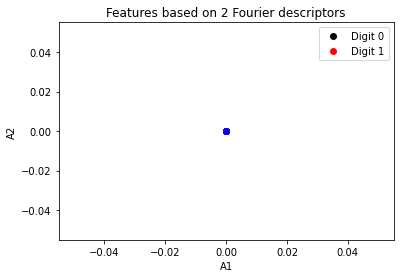

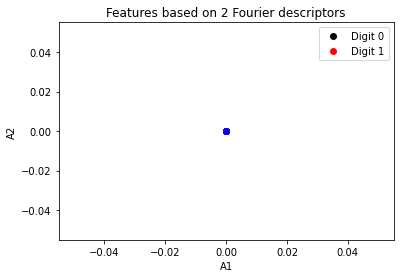

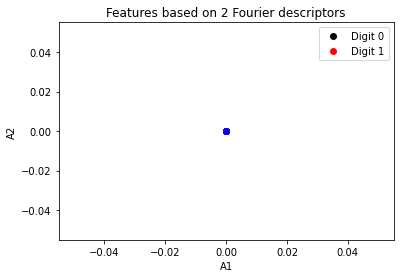

In [ ]:
plotFourier(rotated_images_zeros, rotated_images_ones)
plotFourier(translated_images_zeros, translated_images_zeros)
plotFourier(scaled_images_zeros, scaled_images_ones)
plotFourier(transformed_images_zeros, transformed_images_zeros)


#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

### Pre -processing

In [ ]:
import cv2
import numpy as np
from skimage import measure
from skimage.filters import threshold_otsu

def preprocessing(images):
    processed_images = []

    disksize_close = skimage.morphology.disk(1.2)
    disksize_open = skimage.morphology.disk(0) # no opening


    for image in images:
        
        #allocation
        mask_morph = np.zeros_like(image)


        #tresholding
        threshold = threshold_otsu(image)
        binary = np.asarray((image > threshold).astype(float))
        binary[binary==1] = 255

        #combinaison of morphological operation
        skimage.morphology.closing(binary, disksize_close,out=mask_morph)
        #Opening
        skimage.morphology.opening(mask_morph, disksize_open,out=mask_morph)
        #Remove holes
        mask_morph= skimage.morphology.remove_small_holes(mask_morph, 2)
        #Remove objects
        mask_morph= skimage.morphology.remove_small_objects(mask_morph, 4)
 
        # Ajout de l'image prétraitée à la liste de sortie
        processed_images.append(mask_morph)
    return processed_images



c:\Users\hugom\Anaconda3\envs\iapr\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?


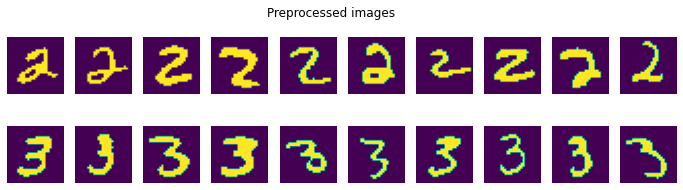

In [ ]:
two_bin = preprocessing(twos_im)
three_bin =preprocessing(threes_im)

fig, axes = plt.subplots(2, len(two_bin), figsize=(12, 3))
for ax, im,  in zip(axes[0], two_bin ):
    ax.imshow(im)
    ax.axis('off')
    
    
for ax, im,in zip(axes[1], three_bin):
    ax.imshow(im)
    ax.axis('off')
fig.suptitle("Preprocessed images")
plt.show()

In [ ]:
from scipy.interpolate import splprep, splev
def features_object(bin_im):

    """
    Calculate features shape of images

    Args:
        bin_im (numpy.ndarray): list of 2D binary image

    Returns:
        tuple: tuple contains :
         - perimeter
         -area
         -compacity
         -the contour 
    """
    
    t = len(bin_im)
    #allocation
    aire = np.zeros(t)
    perim = np.zeros(t)
    compacity = np.zeros(t)
    contour_store = []

    # Iterate over all images
    for i in range(t):

        img = bin_im[i]

        # Obtention of contour
        contours = measure.find_contours(img,0.5)

        # The contours arrays should contain a finite number of equi-distant points for each image 
        max_contour = max(contours, key=len)

        # Interpolation method found on the net
        tck, u = splprep(max_contour.T, s=0, per=True)
        u_new = np.linspace(u.min(), u.max(), 1000)
        x_new, y_new = splev(u_new, tck)

        # Full the number with the interpolate contour, to use the adaptated function
        interp_contour = np.zeros_like(img, dtype=np.uint8)
        interp_contour[np.round(y_new).astype(int), np.round(x_new).astype(int)] = 1

        # Compute the perimeter
        props= measure.regionprops(interp_contour.astype(int))[0]
        aire[i] = props.area
        perim[i] = props.perimeter
        compacity[i]= np.square(perim[i])/aire[i]
        contour_store.append(interp_contour)

        


    return perim, aire, compacity, contour_store

### Plot the Contour

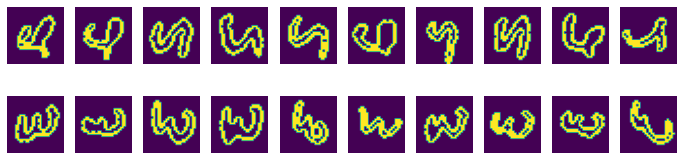

In [ ]:
twos_f =features_object(two_bin)
threes_f =features_object(three_bin)


fig, axes = plt.subplots(2, len(two_bin), figsize=(12, 3))
for ax, im,  in zip(axes[0], twos_f[3] ):
    ax.imshow(im)
    ax.axis('off')
    
    
for ax, im,in zip(axes[1], threes_f[3]):
    ax.imshow(im)
    ax.axis('off')

Image is rotated because we needed some condition to the interpolation.

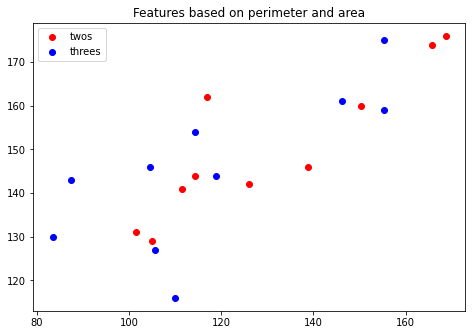

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = twos_f[0]
twos_f2 = twos_f[1]
threes_f1 = threes_f[0]
threes_f2 = threes_f[1]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

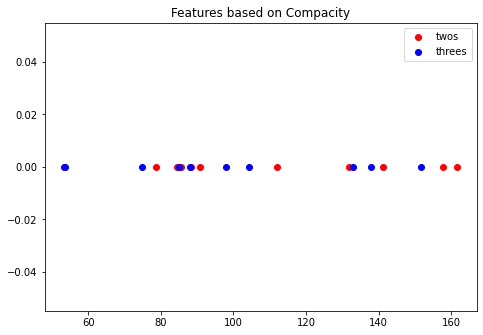

In [ ]:
# TODO: Make the 1D plot of the compacity
# Plot features for all images
twos_f3 = twos_f[2]
threes_f3 = threes_f[2]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f3, [0]*10, color='r', label='twos')
ax.scatter(threes_f3, [0]*10, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on Compacity")
plt.show()

While perimeter and area are important measures for characterizing the shape and size of objects in an image, they may not be sufficient to capture all the relevant information needed to cluster images of digits. 
In addition, clustering algorithms are sensitive to the scale and distribution of the features used. Perimeter and area are not normalized measures and can vary significantly depending on the size and orientation of the digit in the image. This can result in biased or uneven clustering, where similar-looking digits are clustered together but dissimilar-looking digits are not.

To improve the clustering results, we may need to consider additional features that capture more nuanced aspects of the digit images, such as projections

####  Discussion

### 2.2. Additional method (4 pts)

#### Discussion

The projections can be used to differentiate between a 2 and a 3 because the two digits have different shapes, which result in different projection values.

When we project a digit onto a specific axis, we obtain a set of values that represent the distribution of the digit along that axis. For example, if we project the digit onto the X-axis, we obtain a set of values that represent how much of the digit lies to the left or right of the center of the image. Similarly, if we project the digit onto the Y-axis, we obtain a set of values that represent how much of the digit lies above or below the center of the image.

In [ ]:
def calculate_proj(image):
    """
    Calculate the binary projection

    Args:
        image (numpy.ndarray): list of image

    Returns:
        tuple: list of tuple contains projection en X et en Y.

        
    """

    t = len(image)
    projection_x=[]
    projection_y=[]

    for i in range(t):

        img = image[i]
        # Calcul de la projection en X
        projection_x.append(np.sum(img, axis=0))

        # Calcul de la projection en Y
        projection_y.append(np.sum(img, axis=1)) 

    return projection_x, projection_y

In [ ]:
two_proj = calculate_proj(two_bin)
three_proj = calculate_proj(three_bin)

In [ ]:



def plot_proj(projections_list_2, projections_list_3):

    """
    Plot proj

    Args:
        projections_list (list): list of projection in X and Y
    """

    fig, axs = plt.subplots(4, 10, figsize=(25, 10))
    for i in range(10):
        # Trace les projections en X et en Y du chiffre 2
        axs[0, i].plot(two_proj[0][i])
        axs[0, i].set_title(" X - Chiffre 2")
        axs[1, i].plot(two_proj[1][i])
        axs[1, i].set_title(" Y - Chiffre 2")

        # Trace les projections en X et en Y du chiffre 3
        axs[2, i].plot(three_proj[0][i])
        axs[2, i].set_title("X - Chiffre 3")
        axs[3, i].plot(three_proj[1][i])
        axs[3, i].set_title("Y - Chiffre 3")

    plt.tight_layout()
    plt.show()



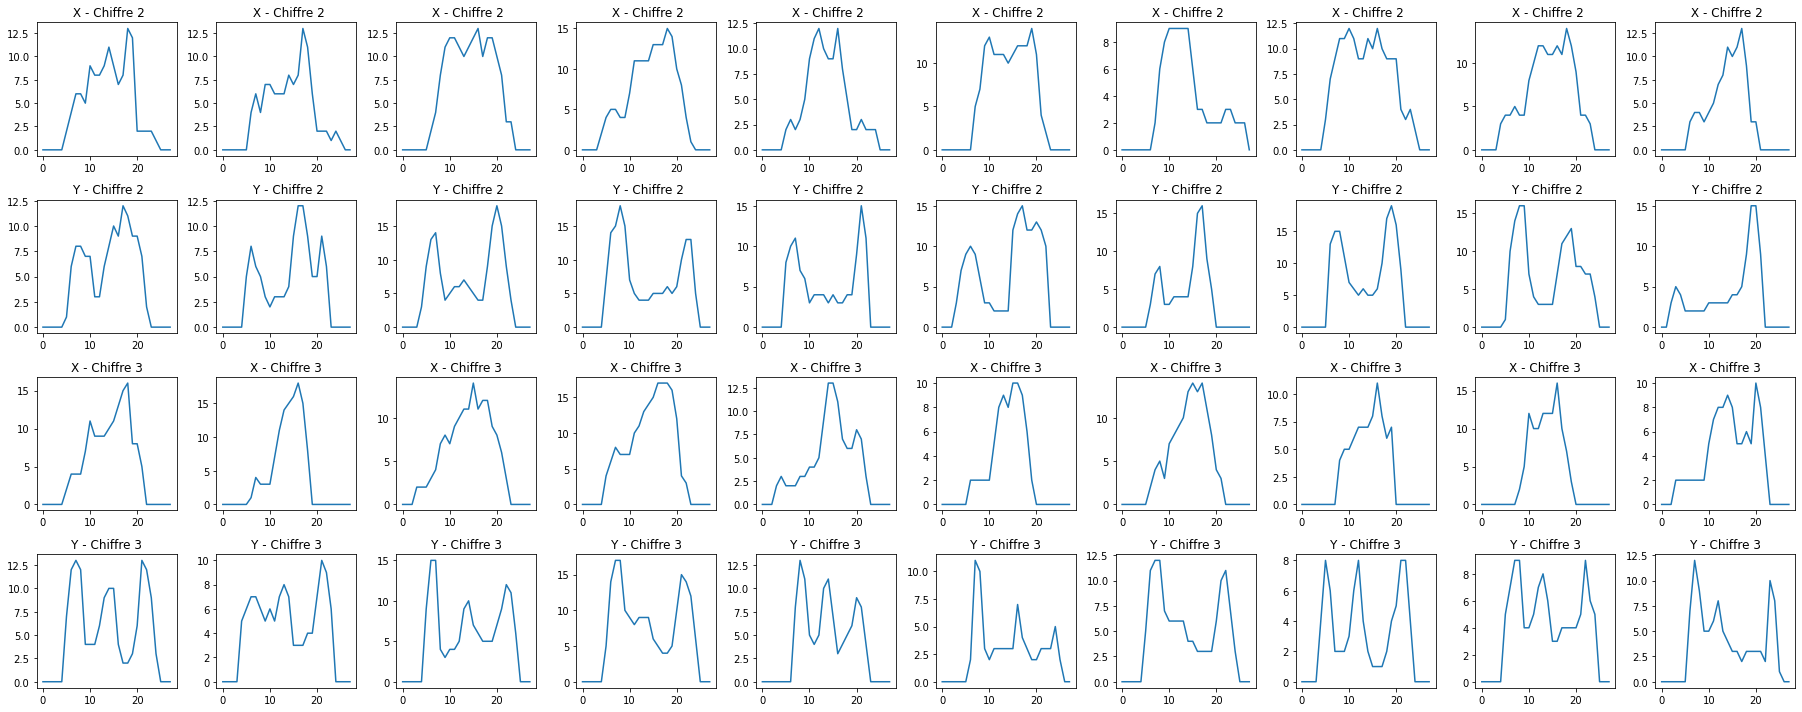

In [ ]:
plot_proj(two_proj,three_proj)

For the numbers 2 and 3, the X projection is similar because both numbers have a curve on the right side. However, the Y projection is different because the number 2 has two peaks of distribution in Y, while the number 3 has only one. Therefore, by using the Y projection, one can differentiate a number 2 from a number 3.